2.6 Neural Network Class - MNIST Intro (July 2023)

References

> Make Your Own Neural Network by Tariq Rashid

> https://github.com/makeyourownneuralnetwork

> Numpy

> https://numpy.org

> Pandas

> https://pandas.pydata.org

> Python

> https://www.python.org

> https://docs.python.org/3/library/csv.html

> Scipy

> https://scipy.org

> Wikipedia

> https://en.wikipedia.org/wiki/MNIST_database

> https://en.wikipedia.org/wiki/Normalization_(image_processing)

> https://en.wikipedia.org/wiki/Spatial_anti-aliasing

IDE
> Google Colab

> https://colab.research.google.com




A class is a reuseable blueprint for creating objects.

Our draft class will simulate a biological neural network by having three parts that serve to:

> initialize - set quantity of input, hidden, & output nodes

> train - refine network weights by using training data

> query - given input data, provide an answer from the output nodes

Here is our final draft, which serves as our starting point for this worksheet

In [ ]:
import numpy as np
import scipy.special

# draft class definition for a neural network
class neuralNetwork:

  # intialize the neural network
  def __init__(self, inputNodes, hiddenNodes, outputNodes, learningRate):
    # layers and learning rates
    self.iNodes = inputNodes
    self.hNodes = hiddenNodes
    self.oNodes = outputNodes
    self.learnRate = learningRate
    # link weights connecting the layers via matrices
    self.wih = np.random.normal(0.0, pow(self.iNodes, -0.5), (self.hNodes, self.iNodes))
    self.who = np.random.normal(0.0, pow(self.hNodes, -0.5), (self.oNodes, self.hNodes))
    # sigmoid activation function
    self.activation_function = lambda x: scipy.special.expit(x)
    pass

  # train the neural network
  def train(self, inputs_list, targets_list):
    # convert the inputs list to a 2d array
    inputs = np.array(inputs_list, ndmin = 2).T
    # convert the targets list to a 2d array
    targets = np.array(targets_list, ndmin = 2).T
    # calculate signals into the hidden layer
    hidden_inputs = np.dot(self.wih, inputs)
    # calculate signals emerging from the hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)
    # calculate signals into final output layer
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate signals emerging from the final output layer
    final_outputs = self.activation_function(final_inputs)

    # output layer error is (target - actual)
    output_errors = targets - final_outputs
    # hidden layer error
    hidden_errors = np.dot(self.who.T, output_errors)
    # update the link weights between hidden & output layers
    self.who += self.learnRate * np.dot((output_errors * final_outputs *
      (1.0 - final_outputs)), np.transpose(hidden_outputs))
    # update the link weights between input & hidden layers
    self.wih += self.learnRate * np.dot((hidden_errors * hidden_outputs *
      (1.0 - hidden_outputs)), np.transpose(inputs))

  # query the neural network
  def query(self, inputs_list):
    # convert inputs list to 2d array
    inputs = np.array(inputs_list, ndmin=2).T
    # calculate signals into hidden layer
    hidden_inputs = np.dot(self.wih, inputs)
    # calculate the signals emerging from hidden layer
    hidden_outputs = self.activation_function(hidden_inputs)
    # calculate signals into final output layer
    final_inputs = np.dot(self.who, hidden_outputs)
    # calculate the signals emerging from final output layer
    final_outputs = self.activation_function(final_inputs)
    return final_outputs


Here is test code for the class

In [ ]:
# test
inputNodes = 3
hiddenNodes = 3
outputNodes = 3
learningRate = 0.3
n = neuralNetwork(inputNodes, hiddenNodes, outputNodes, learningRate)
n.query([1.0, 0.5, -1.5])

array([[0.48900539],
       [0.60154223],
       [0.72015492]])

Getting computers to correctly classify what an image contains, sometimes called the image recognition​ problem, has withstood decades of attack. Only recently has good progress been made, and methods like neural networks have been a crucial part of these leaps forward.

There is a collection of images of handwritten numbers used by artificial intelligence researchers as a popular set to test their latest ideas and algorithms. It is broken up into two subsets:

> http://www.pjreddie.com/media/files/mnist_train.csv

> The training set​ is the set of 60,000​ labelled examples used to train the neural network. Labelled​ means the inputs come with the desired output, that is, what the answer should be.

> http://www.pjreddie.com/media/files/mnist_test.csv

> The smaller test set​ of 10,000​ is used to see how well our idea or algorithm works. This too contains the correct labels so we can check to see if our own neural network got the answer right or not.

We will start our experiments with subsets of the subsets

> https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_train_100.csv

> 100 records from the training subset

> https://raw.githubusercontent.com/makeyourownneuralnetwork/makeyourownneuralnetwork/master/mnist_dataset/mnist_test_10.csv


> 10 records from the test subset

Next we will work on importing these data files into colab.

We can use the code provided for this task in colab's code snippets

In [ ]:
# Import PyDrive and associated libraries.
# This only needs to be done once per notebook.
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
#
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file_id = 'REPLACE_WITH_YOUR_FILE_ID'
downloaded = drive.CreateFile({'id': file_id})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

... or we can touch the Google Drive icon located on the files panel (left side of our screen)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

The other option available to us is to drag and drop the files we want from google drive into the file icon (left side of the colab screen). This will require refrshing each time we access the workbook/notebook

> This will result in the following file paths:

  > content/mnist_test_10.csv

  > content/minist_train_100.csv

Let's take a look at the test file

In [25]:
data_file = open('mnist_test_10.csv', 'r')
data_list = data_file.readlines()
data_file.close()

len(data_list)

data_list[0]

#max(data_list[3])

'7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,

Let's take a look one of the numbers in the test file

> Remember that each pixel in this 28 x 28 pixel array has a different value ranging from 0 to 255.

> Conceptually there is a grid of pixels overlaying a defined space (height, width) in which a number has been hand written.  Battleship, chess board, grid squares ... take your pick

> First three lines of the code snippet serve to import the libraries that we will need to accomplish the task

> Fourth line of code takes the first record from data_list[0] and splits the string by commas

> Fifth line has several parts that will work on the all_values data

  > * [1:] takes everything except for the first element of the list

  > * numpy.asfarray() converts text strings into real numbers and creates an array of them

  > * .reshape((28,28)) wraps the list of numbers around every 28 elements in order to make a square 28 by 28 matrix

  > * the results of all of this work is a variable called image_array

> Sixth line does the following

  > *  plots the image_array using the imshow() function

  > * uses a greyscale colour palette via the cmap='Greys'



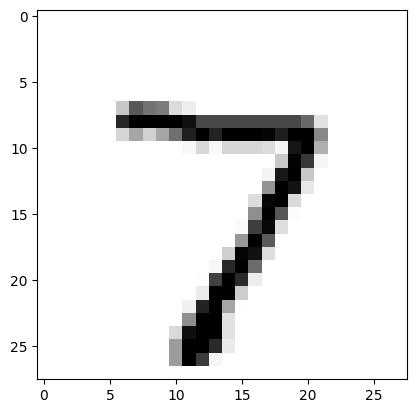

In [32]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

all_values = data_list[0].split(',')
image_array = np.asfarray(all_values[1:]).reshape(28,28)
plt.imshow(image_array, cmap='Greys', interpolation='None')

Let's access the test file via the csv library

In [15]:
import csv

with open('mnist_test_10.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for row in spamreader:
        print(', '.join(row))

7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,84,185,159,151,60,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,222,254,254,254,254,241,198,198,198,198,198,198,198,198,170,52,0,0,0,0,0,0,0,0,0,0,0,0,67,114,72,114,163,227,254,225,254,254,254,250,229,254,254,140,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,17,66,14,67,67,67,59,21,236,254,106,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,83,253,209,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,233,255,83,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,129,254,238,44,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,59,249,254,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,133,254,187,5,0,0

Let's access the test file via the pandas library

In [13]:
import pandas as pd

pd.read_csv('mnist_test_10.csv')

,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Let's access the training file via pandas

In [14]:
import pandas as pd

pd.read_csv('mnist_train_100.csv')

19
mnist_train_100.csv


,5,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.608,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
